<a href="https://colab.research.google.com/github/priyagijain/projects/blob/main/handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing required libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
#Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 60s 135ms/step - loss: 0.2466 - accuracy: 0.9269 - val_loss: 0.0964 - val_accuracy: 0.9737
Epoch 2/10
422/422 [==============================] - 63s 149ms/step - loss: 0.0669 - accuracy: 0.9803 - val_loss: 0.0446 - val_accuracy: 0.9865
Epoch 3/10
422/422 [==============================] - 55s 130ms/step - loss: 0.0463 - accuracy: 0.9858 - val_loss: 0.0437 - val_accuracy: 0.9887
Epoch 4/10
422/422 [==============================] - 55s 131ms/step - loss: 0.0378 - accuracy: 0.9881 - val_loss: 0.0396 - val_accuracy: 0.9897
Epoch 5/10
422/422 [==============================] - 54s 128ms/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0456 - val_accuracy: 0.9878
Epoch 6/10
422/422 [==============================] - 56s 132ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0392 - val_accuracy: 0.9898
Epoch 7/10
422/422 [==============================] - 54s 128ms/step - loss: 0.0187 - accuracy: 0.9945 - val_loss: 0.0386 - val_ac

In [ ]:
#Get user-defined index
user_index = int(input("Enter the index of the image you want to predict: "))

In [ ]:
#Predict value at user-defined index
prediction = model.predict(x_test[user_index].reshape(1, 28, 28, 1))
predicted_label = tf.argmax(prediction, axis=1).numpy()[0]

1/1 [==============================] - 0s 38ms/step


Predicted label: 9


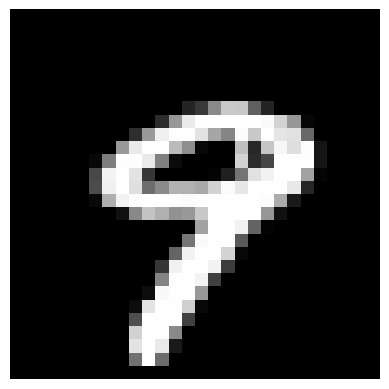

In [ ]:
#Print the predicted label and show the image
print(f"Predicted label: {predicted_label}")
plt.imshow(x_test[user_index].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()